# Design with explicit Formula

This tutorial notebook shows how to setup a D-optimal design with BoFire while providing an explicit formula and not just one of the four available keywords `linear`, `linear-and-interaction`, `linear-and-quadratic`, `fully-quadratic`.

Make sure that `cyipopt`is installed. The recommend way is the installation via conda `conda install -c conda-forge cyipopt`.

## Imports

In [ ]:
import bofire.strategies.api as strategies
from bofire.data_models.api import Domain, Inputs
from bofire.data_models.features.api import ContinuousInput
from bofire.data_models.strategies.api import DoEStrategy
from bofire.data_models.strategies.doe import DOptimalityCriterion
from bofire.utils.doe import get_confounding_matrix

## Setup of the problem

In [ ]:
input_features = Inputs(
    features=[
        ContinuousInput(key="a", bounds=(0, 5)),
        ContinuousInput(key="b", bounds=(40, 800)),
        ContinuousInput(key="c", bounds=(80, 180)),
        ContinuousInput(key="d", bounds=(200, 800)),
    ],
)
domain = Domain(inputs=input_features)

## Definition of the formula for which the optimal points should be found

In [ ]:
model_type = "a + {a**2} + b + c + d + a:b + a:c + a:d + b:c + b:d + c:d"
model_type

'a + {a**2} + b + c + d + a:b + a:c + a:d + b:c + b:d + c:d'

## Find D-optimal Design

In [ ]:
data_model = DoEStrategy(
    domain=domain,
    criterion=DOptimalityCriterion(formula=model_type),
    ipopt_options={"maxiter": 100, "disp": 0},
)
strategy = strategies.map(data_model=data_model)
design = strategy.ask(17)
design

a           b           c           d
0   5.000000e+00   40.000000  180.000002  199.999998
1   2.047832e+00   40.000000  180.000002  800.000008
2   5.000000e+00   40.000000  180.000002  800.000008
3   5.000000e+00  800.000008   79.999999  199.999998
4   5.000000e+00  800.000008   79.999999  800.000008
5  -9.973772e-09   40.000000  180.000002  199.999998
6   5.000000e+00  800.000008  180.000002  199.999998
7  -9.973772e-09  800.000008  180.000002  800.000008
8  -8.091201e-09   40.000000   79.999999  199.999998
9   5.000000e+00   40.000000   79.999999  199.999998
10 -9.981833e-09   40.000000   79.999999  800.000008
11  2.907832e+00   40.000000   79.999999  800.000008
12 -9.976118e-09  800.000008  180.000002  199.999998
13 -9.906825e-09  800.000008   79.999999  199.999998
14 -9.981833e-09   40.000000   79.999999  800.000008
15 -8.091050e-09  800.000008   79.999999  800.000008
16  5.000000e+00  800.000008  180.000002  800.000008

## Analyze Confounding

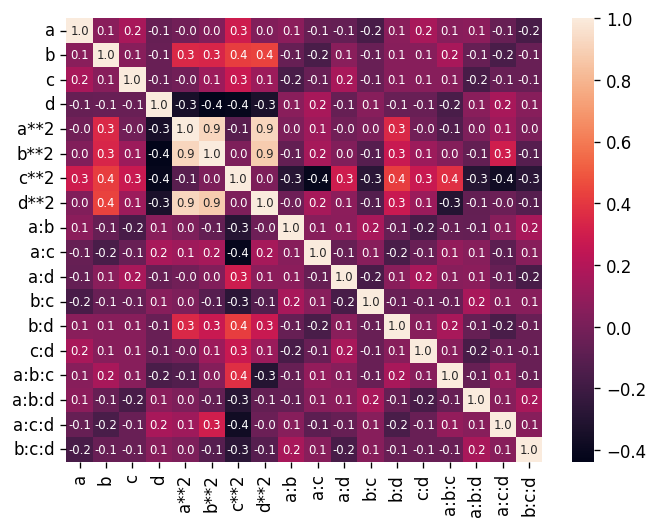

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


matplotlib.rcParams["figure.dpi"] = 120

m = get_confounding_matrix(
    domain.inputs,
    design=design,
    interactions=[2, 3],
    powers=[2],
)

sns.heatmap(m, annot=True, annot_kws={"fontsize": 7}, fmt="2.1f")
plt.show()